In [1]:
import warnings   
warnings.simplefilter("ignore") 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
import sys
sys.path.append('/Users/Serene/calour')
import calour as cl
import numpy as np
import pandas as pd
import calour.cahelper as cah
import calour.analysis

from scipy.stats import sem

In [2]:
cl.set_log_level(40) # get rid of warnings in calour

In [3]:
ag = cl.read_taxa('data/ag.biom','data/ag_fecals.map.txt',sparse=False, filter_orig_reads=1000)

In [4]:
np.random.seed(31)
ag_sub1 = ag.filter_min_abundance(5)

# vegetable types

In [6]:
ag.sample_metadata.TYPES_OF_PLANTS.value_counts()

Unknown         3085
11 to 20        1660
6 to 10         1187
21 to 30         848
More than 30     573
Less than 5      359
Unspecified      143
Name: TYPES_OF_PLANTS, dtype: int64

## check p-values

In [8]:
def ds_gap(pvals, cdf):
    gap = []
    for i in range(len(pvals)):
        dist = pvals[i] - cdf[i]
        if dist > 0:
            gap.append(dist)
        if dist <= 0:
            gap.append(0)
    norm = np.sum(gap)
    return norm

In [10]:
xx = ag_sub1.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5', alpha = 1, fdr_method='dsfdr')

In [11]:
yy = xx.feature_metadata['_calour_diff_abundance_pval']

<IPython.core.display.Javascript object>


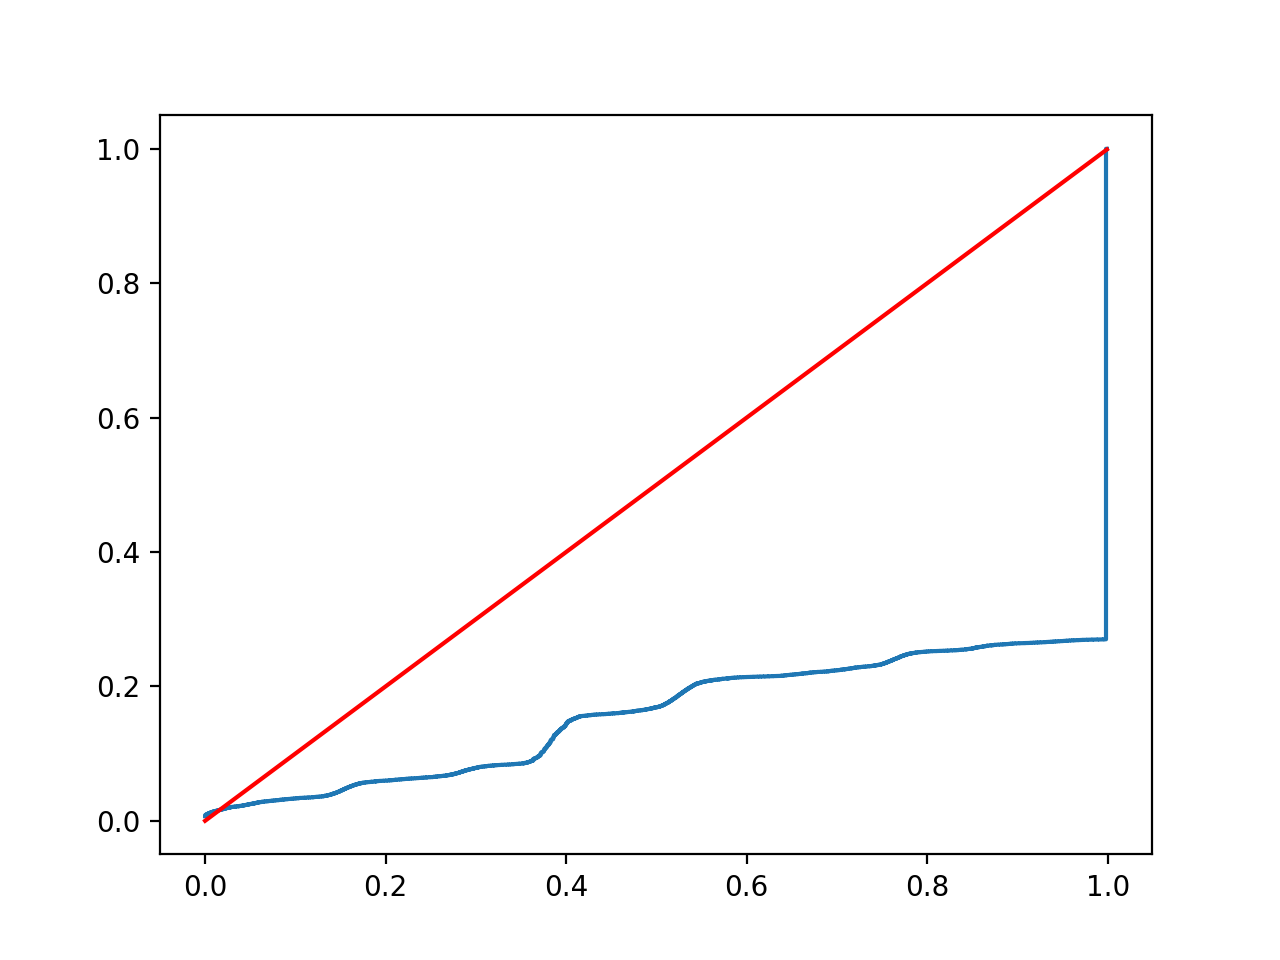

2772.9084675


In [12]:
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import linalg as LA

sample = yy  
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')

gap = []
for i in range(len(x)):
    dist = x[i] - y[i]
    if dist > 0:
        gap.append(dist)
    if dist <= 0:
        gap.append(0)
norm = np.sum(gap)
print(norm)

In [15]:
np.arange(50,400,50)

array([ 50, 100, 150, 200, 250, 300, 350])

## subsamples

In [6]:
np.random.seed(31)

B = 100
ss1 = np.arange(50,400,50)

otu_bh1 = []
otu_fbh1 = []
otu_ds1 = []

err_bh1 = []
err_fbh1 = []
err_ds1 = []

for i in ss1:
    print('subsample...: %s' %(i))
    
    bh_num1 = []
    fbh_num1 = []
    ds_num1 = []
    for j in range(B):
        ag_sub2 = ag_sub1.downsample('TYPES_OF_PLANTS', num_keep=i)
        ds = ag_sub2.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5',fdr_method='dsfdr')
        bh = ag_sub2.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5',fdr_method='bhfdr')
        fbh = ag_sub2.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5',fdr_method='filterBH')

        if ds is None:
            sig_ds = 0
        else:
            sig_ds = len(ds.feature_metadata.index)
        if bh is None:
            sig_bh = 0
        else:
            sig_bh = len(bh.feature_metadata.index)
        if fbh is None:
            sig_fbh = 0
        else:
            sig_fbh = len(fbh.feature_metadata.index)

        ds_num1.append(sig_ds)
        bh_num1.append(sig_bh)
        fbh_num1.append(sig_fbh)
    
    otu_ds1.append(np.mean(ds_num1))
    otu_bh1.append(np.mean(bh_num1))
    otu_fbh1.append(np.mean(fbh_num1))
    
    err_ds1.append(sem(ds_num1))  
    err_bh1.append(sem(bh_num1))
    err_fbh1.append(sem(fbh_num1))

subsample...: 50
subsample...: 100
subsample...: 150
subsample...: 200
subsample...: 250
subsample...: 300
subsample...: 350


<IPython.core.display.Javascript object>


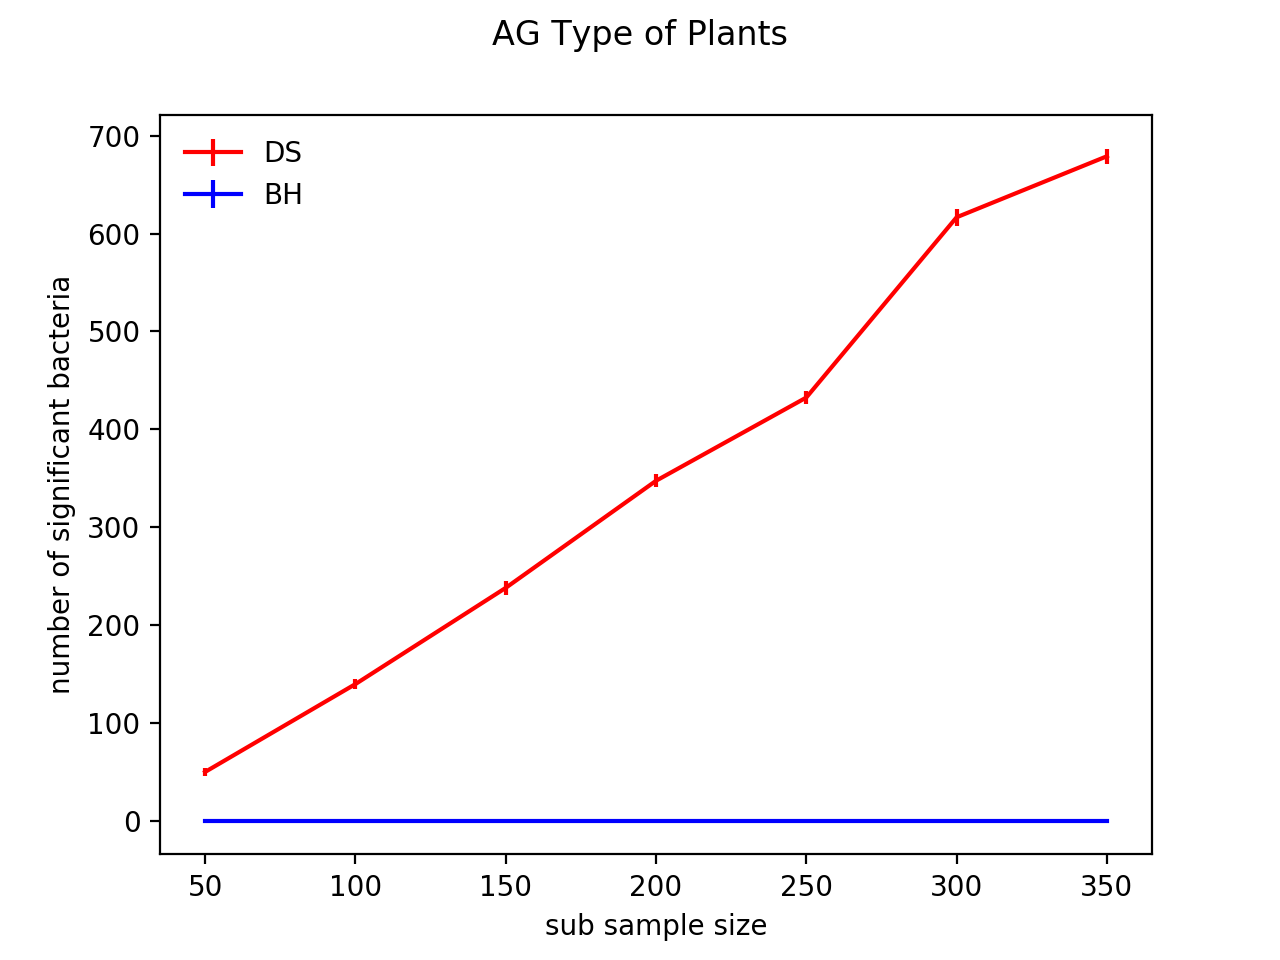

In [17]:
import pylab 

plt.figure()
plt.errorbar(ss1, otu_ds1, yerr=err_ds1, color = 'red', label = 'DS')
#plt.errorbar(ss1, otu_fbh1, yerr=err_fbh1, color = 'orange')
plt.errorbar(ss1, otu_bh1, yerr=err_bh1, color = 'blue', label = 'BH')
plt.suptitle('AG Type of Plants')
plt.xlabel('sub sample size')
plt.ylabel('number of significant bacteria')
plt.legend(loc='upper left', frameon=False)

#pylab.xlim([0, 65])

In [14]:
import pickle
with open("ag_plant1_subsample.pkl", "wb") as f:
    pickle.dump((ss1, otu_ds1, otu_bh1, otu_fbh1, err_ds1, err_bh1, err_fbh1), f)

## antibiotic history

In [5]:
ag.sample_metadata.ANTIBIOTIC_HISTORY.value_counts()

I have not taken antibiotics in the past year.    5056
Year                                              1112
6 months                                           974
Month                                              243
Unknown                                            211
Week                                               169
Unspecified                                         90
Name: ANTIBIOTIC_HISTORY, dtype: int64

In [18]:
np.random.seed(32)

B = 200
ss2 = np.arange(50,400,50)

otu_bh2 = []
otu_fbh2 = []
otu_ds2 = []

err_bh2 = []
err_fbh2 = []
err_ds2 = []

for i in ss2:
    print('subsample...: %s' %(i))
    
    bh_num2 = []
    fbh_num2 = []
    ds_num2 = []
    for j in range(B):
        ag_sub2 = ag_sub2.downsample('ANTIBIOTIC_HISTORY', num_keep=i)
        ds = ag_sub2.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                ['Week', 'Month', 'Year', '6 months'],fdr_method='dsfdr')
        bh = ag_sub2.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                ['Week', 'Month', 'Year', '6 months'],fdr_method='bhfdr')
        fbh = ag_sub2.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                ['Week', 'Month', 'Year', '6 months'],fdr_method='filterBH')

        if ds is None:
            sig_ds = 0
        else:
            sig_ds = len(ds.feature_metadata.index)
        if bh is None:
            sig_bh = 0
        else:
            sig_bh = len(bh.feature_metadata.index)
        if fbh is None:
            sig_fbh = 0
        else:
            sig_fbh = len(fbh.feature_metadata.index)

        ds_num2.append(sig_ds)
        bh_num2.append(sig_bh)
        fbh_num2.append(sig_fbh)
    
    otu_ds2.append(np.mean(ds_num2))
    otu_bh2.append(np.mean(bh_num2))
    otu_fbh2.append(np.mean(fbh_num2))
    
    err_ds2.append(sem(ds_num2))  
    err_bh2.append(sem(bh_num2))
    err_fbh2.append(sem(fbh_num2))

subsample...: 50
subsample...: 100


ValueError: No groups have more than 100 items